# **Import libraries**

In [1]:
# !pip install imperio

In [130]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
import kagglehub
from kagglehub import KaggleDatasetAdapter
import matplotlib.pyplot as plt
from imperio import BoxCoxTransformer, ZCATransformer, FrequencyImputationTransformer, TargetImputationTransformer, SmoothingTransformer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold

In [3]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# **Load Datasets**

## Dataset 1

[Chosen Dataset](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)

I'll try to predict math score.

In [4]:
df_st_per = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "spscientist/students-performance-in-exams",
  'StudentsPerformance.csv',
)

Using Colab cache for faster access to the 'students-performance-in-exams' dataset.


In [5]:
df_st_per.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df_st_per.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


But first, let's encode the data.

In [7]:
df_st_per['gender'] = (df_st_per['gender'] == 'male').astype(int)
df_st_per['lunch'] = (df_st_per['lunch'] == 'standard').astype(int)
df_st_per['test preparation course'] = (df_st_per['test preparation course'] == 'completed').astype(int)

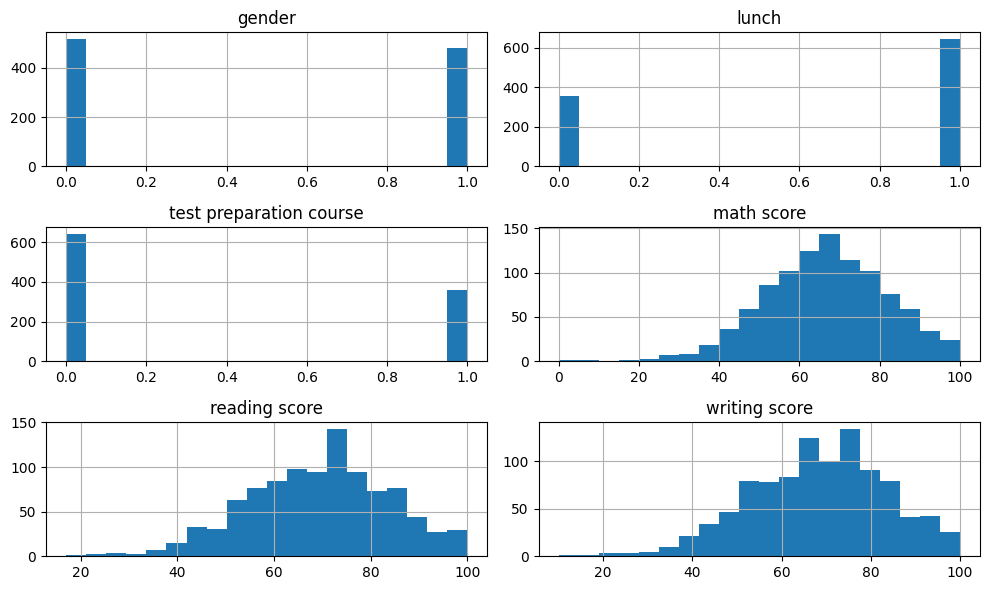

In [8]:
df_st_per.hist(bins=20, figsize=(10, 6))

plt.tight_layout()
plt.show()

In [9]:
X = df_st_per.drop(['race/ethnicity', 'parental level of education', 'math score'], axis=1)
y = df_st_per['math score']

splits = list(kf.split(X))

X_trains1 = [X.iloc[train_idx] for train_idx, _ in splits]
X_tests1  = [X.iloc[val_idx]   for _, val_idx in splits]
y_trains1 = [y.iloc[train_idx] for train_idx, _ in splits]
y_tests1  = [y.iloc[val_idx]   for _, val_idx in splits]

## Dataset 2

In [10]:
df_gr_ad = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "mohansacharya/graduate-admissions",
  'Admission_Predict.csv',
)

Using Colab cache for faster access to the 'graduate-admissions' dataset.


In [11]:
df_gr_ad.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [12]:
df_gr_ad.drop('Serial No.', axis=1, inplace=True)

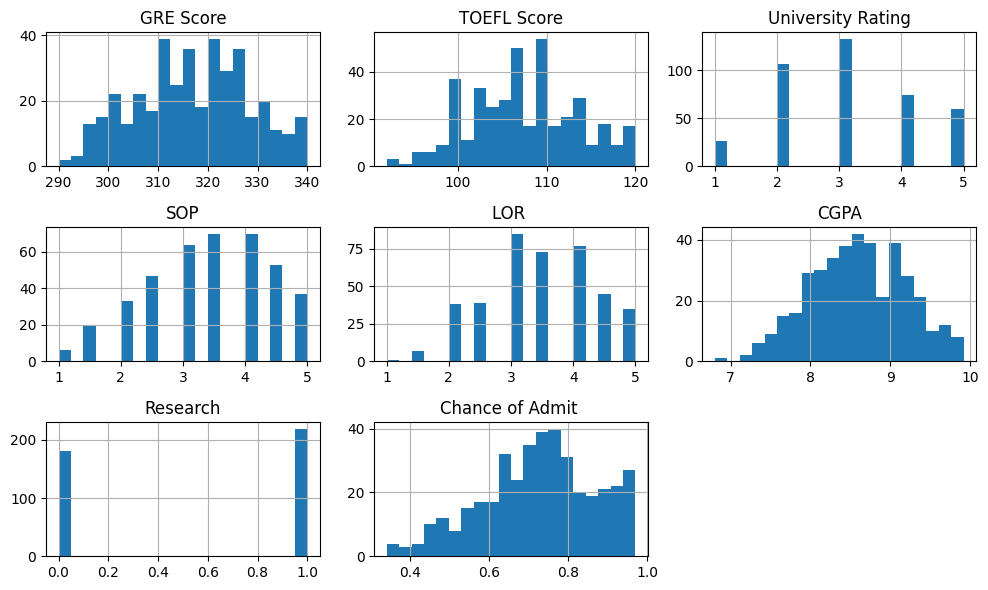

In [13]:
df_gr_ad.hist(bins=20, figsize=(10, 6))

plt.tight_layout()
plt.show()

In [14]:
X = df_gr_ad.drop('Chance of Admit ', axis=1)
y = df_gr_ad['Chance of Admit ']

splits = list(kf.split(X))

X_trains2 = [X.iloc[train_idx] for train_idx, _ in splits]
X_tests2  = [X.iloc[val_idx]   for _, val_idx in splits]
y_trains2 = [y.iloc[train_idx] for train_idx, _ in splits]
y_tests2  = [y.iloc[val_idx]   for _, val_idx in splits]

## Dataset 3

In [15]:
df_av = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "neuromusic/avocado-prices",
  'avocado.csv',
)

Using Colab cache for faster access to the 'avocado-prices' dataset.


In [16]:
df_av.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [17]:
df_av['Date'] = (pd.to_datetime(df_av['Date'])).astype(int)
df_av['type'] = (df_av['type'] == 'conventional').astype(int)
df_av.drop(['Unnamed: 0', 'Total Bags', 'Total Volume'], axis=1, inplace=True)

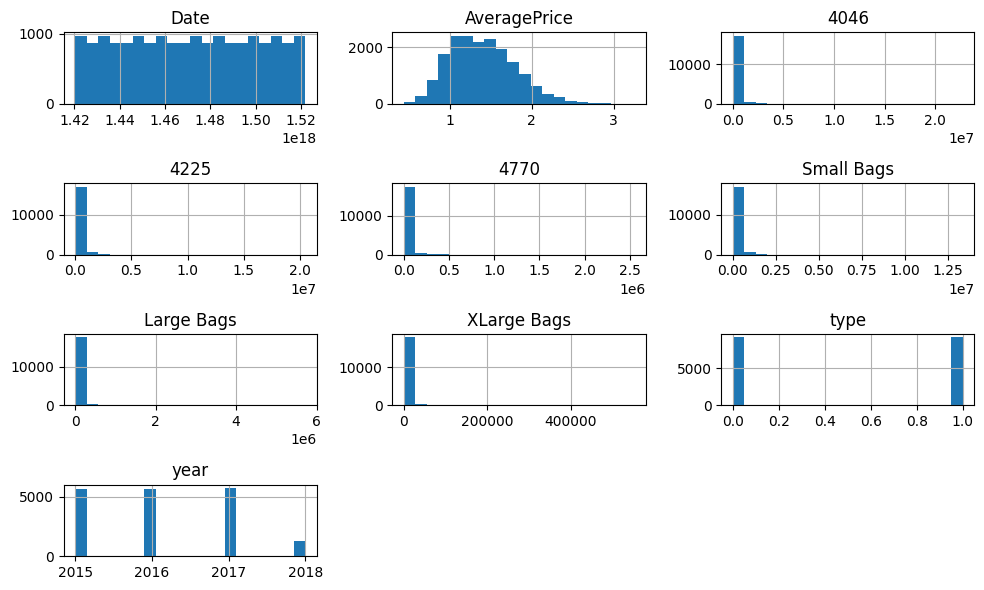

In [18]:
df_av.hist(bins=20, figsize=(10, 6))

plt.tight_layout()
plt.show()

In [19]:
X = df_av.drop(['AveragePrice', 'region'], axis=1)
y = df_av['AveragePrice']

splits = list(kf.split(X))

X_trains3 = [X.iloc[train_idx] for train_idx, _ in splits]
X_tests3  = [X.iloc[val_idx]   for _, val_idx in splits]
y_trains3 = [y.iloc[train_idx] for train_idx, _ in splits]
y_tests3  = [y.iloc[val_idx]   for _, val_idx in splits]

## Dataset 4

In [20]:
df_heart = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "fedesoriano/heart-failure-prediction",
  "heart.csv"
)

Using Colab cache for faster access to the 'heart-failure-prediction' dataset.


In [21]:
df_heart['Sex'] = df_heart['Sex'].replace({'F': 1, 'M': 0})
df_heart['ExerciseAngina'] = df_heart['ExerciseAngina'].replace({'Y': 1, 'N': 0})

In [22]:
categorical_columns = df_heart.select_dtypes(include=['object']).columns.tolist()

In [23]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 86.2+ KB


In [24]:
df_heart = df_heart.drop(df_heart[df_heart['RestingBP'] < 75].index)

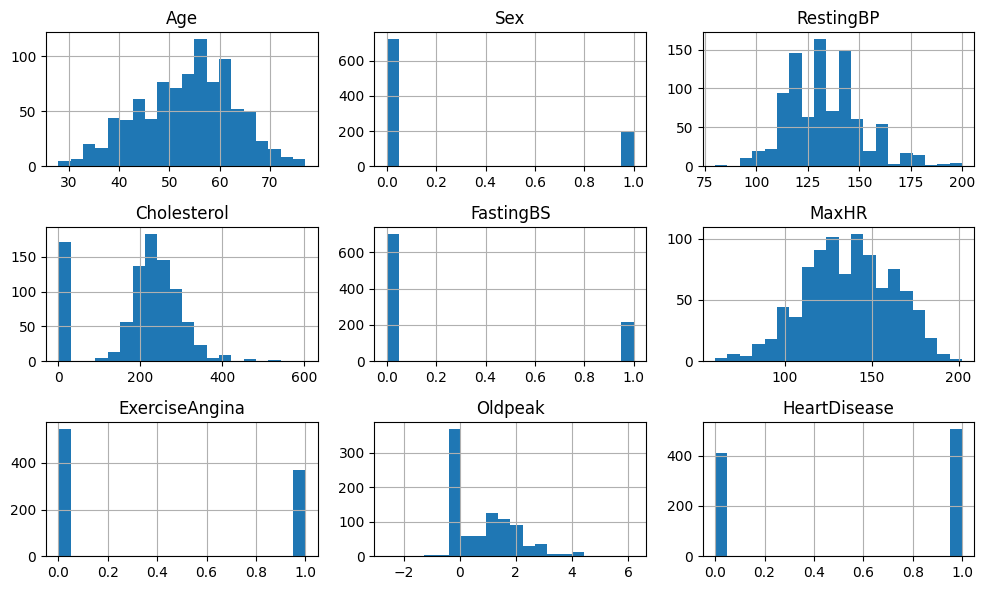

In [25]:
df_heart.hist(bins=20, figsize=(10, 6))

plt.tight_layout()
plt.show()

In [26]:
X = df_heart.drop(['HeartDisease'] + categorical_columns, axis=1)
y = df_heart['HeartDisease']

splits = list(kf.split(X))

X_trains4 = [X.iloc[train_idx] for train_idx, _ in splits]
X_tests4  = [X.iloc[val_idx]   for _, val_idx in splits]
y_trains4 = [y.iloc[train_idx] for train_idx, _ in splits]
y_tests4  = [y.iloc[val_idx]   for _, val_idx in splits]

# **Feature Enginering**

## **Initial Dataset Performances**

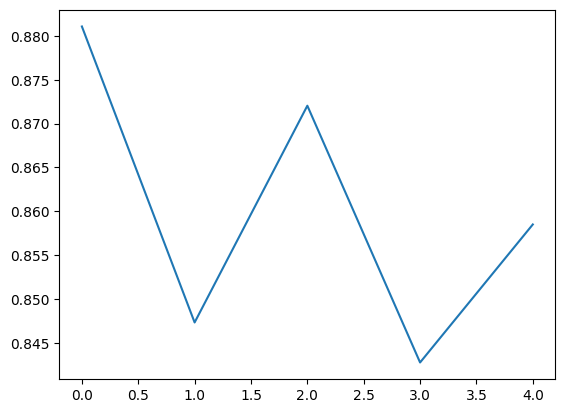

In [27]:
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains1, X_tests1, y_trains1, y_tests1):
  lr = LinearRegression()
  lr.fit(X_train, y_train)
  scores.append(lr.score(X_test, y_test))

plt.plot(scores)
plt.show()

Before any scaling, the dataset gives a stable 0.84-0.88 score.

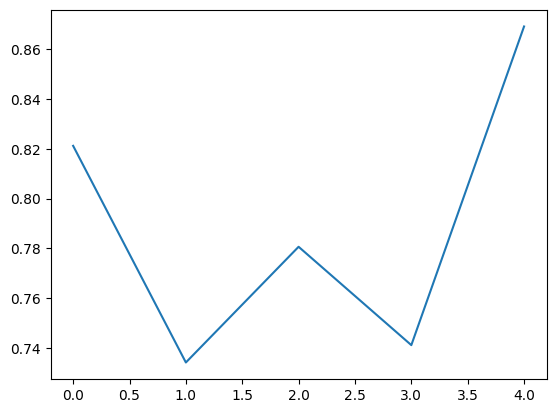

In [28]:
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains2, X_tests2, y_trains2, y_tests2):
  lr = LinearRegression()
  lr.fit(X_train, y_train)
  scores.append(lr.score(X_test, y_test))

plt.plot(scores)
plt.show()

The score of LinearRegression varies a lot from 0.74-0.86.

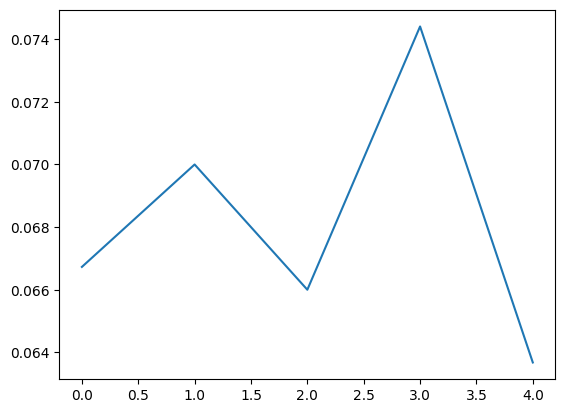

In [29]:
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains3, X_tests3, y_trains3, y_tests3):
  lr = LinearRegression()
  lr.fit(X_train, y_train)
  scores.append(lr.score(X_test, y_test))

plt.plot(scores)
plt.show()

The model before scaling performs quite bad in 0.64-0.74 range.

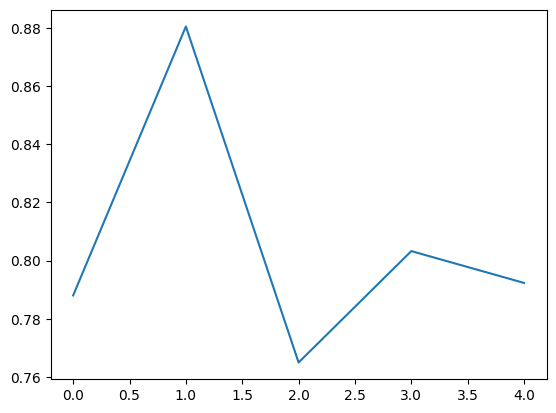

In [30]:
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains4, X_tests4, y_trains4, y_tests4):
  lr = LogisticRegression()
  lr.fit(X_train, y_train)
  scores.append(lr.score(X_test, y_test))

plt.plot(scores)
plt.show()

The model performance also varies a lot ~0.76-0.88.

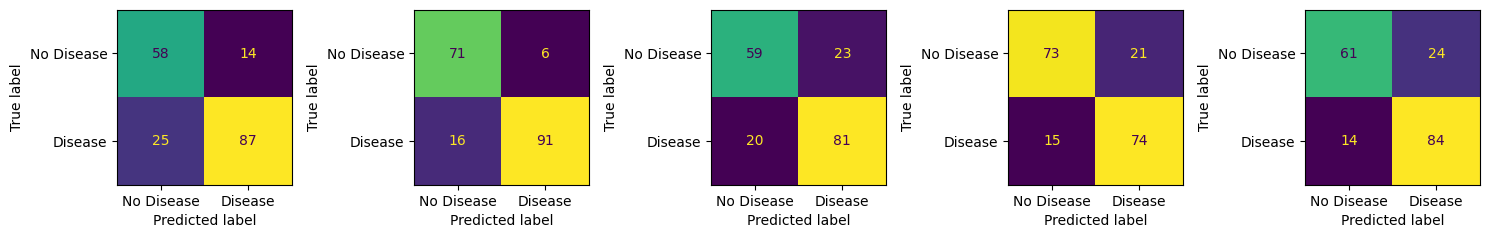

In [31]:
fig, axs = plt.subplots(ncols=5, figsize=(15, 15))

for i, (X_train, X_test, y_train, y_test) in enumerate(zip(X_trains4, X_tests4, y_trains4, y_tests4)):
    lr = LogisticRegression(random_state=42)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=['No Disease', 'Disease']
    )

    disp.plot(ax=axs[i], colorbar=False)

plt.tight_layout()
plt.show()

As we see, the true disease labels are distributed correctly for 74-91 people(which cannot be aloud in real life, of course).

## **Feature Scaling**

### Standardization

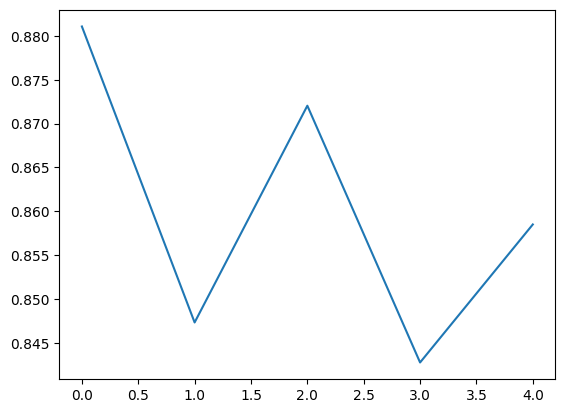

In [32]:
cols_to_scale = ['writing score', 'reading score']
std_scaler = StandardScaler()
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains1, X_tests1, y_trains1, y_tests1):
  X_train_scaled = X_train.copy()
  X_test_scaled = X_test.copy()

  X_train_scaled[cols_to_scale] = std_scaler.fit_transform(X_train[cols_to_scale])
  X_test_scaled[cols_to_scale] = std_scaler.transform(X_test[cols_to_scale])

  lr = LinearRegression()
  lr.fit(X_train_scaled, y_train)
  scores.append(lr.score(X_test_scaled, y_test))

plt.plot(scores)
plt.show()

The performance of this dataset hadn't changed at all - scaling wasn't that important for Linear Regression.

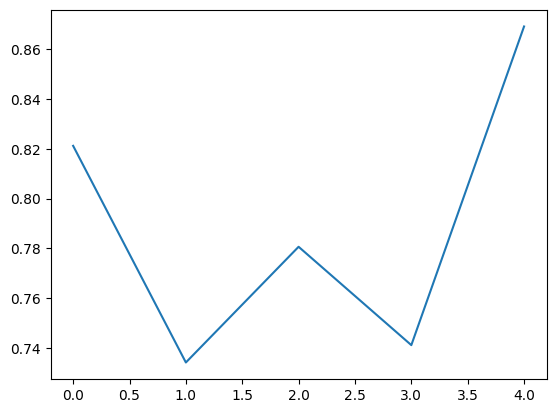

In [33]:
cols_to_scale = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']
std_scaler = StandardScaler()
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains2, X_tests2, y_trains2, y_tests2):
  X_train_scaled = X_train.copy()
  X_test_scaled = X_test.copy()

  X_train_scaled[cols_to_scale] = std_scaler.fit_transform(X_train[cols_to_scale])
  X_test_scaled[cols_to_scale] = std_scaler.transform(X_test[cols_to_scale])

  lr = LinearRegression()
  lr.fit(X_train_scaled, y_train)
  scores.append(lr.score(X_test_scaled, y_test))

plt.plot(scores)
plt.show()

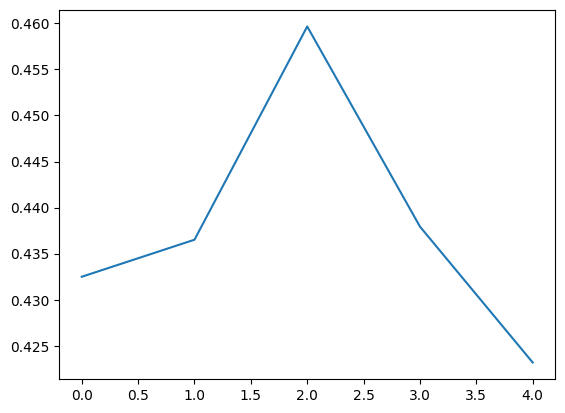

In [34]:
cols_to_scale = ['Date', '4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags']
std_scaler = StandardScaler()
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains3, X_tests3, y_trains3, y_tests3):
  X_train_scaled = X_train.copy()
  X_test_scaled = X_test.copy()

  X_train_scaled[cols_to_scale] = std_scaler.fit_transform(X_train[cols_to_scale])
  X_test_scaled[cols_to_scale] = std_scaler.transform(X_test[cols_to_scale])

  lr = LinearRegression()
  lr.fit(X_train_scaled, y_train)
  scores.append(lr.score(X_test_scaled, y_test))

plt.plot(scores)
plt.show()

Actually, I was thinking I'm doing something wrong that the performance of my datasets dropped, but I didn't mean it to turn that way... The performance dropped a lot (if I don't scale Data it'll be <=0.26). It means that the linear relationship between them was kept by the scale of the data, but not on correlation.

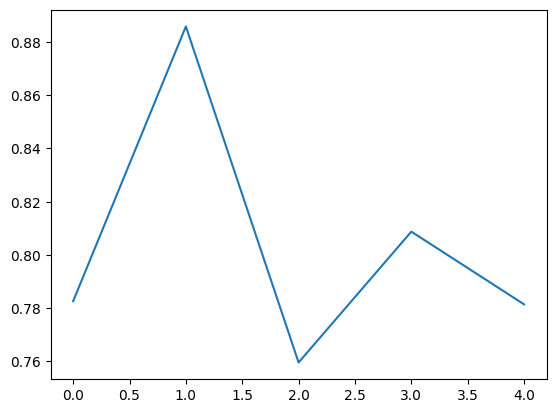

In [35]:
cols_to_scale = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR','Oldpeak']
std_scaler = StandardScaler()
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains4, X_tests4, y_trains4, y_tests4):
  X_train_scaled = X_train.copy()
  X_test_scaled = X_test.copy()

  X_train_scaled[cols_to_scale] = std_scaler.fit_transform(X_train[cols_to_scale])
  X_test_scaled[cols_to_scale] = std_scaler.transform(X_test[cols_to_scale])

  lr = LogisticRegression()
  lr.fit(X_train_scaled, y_train)
  scores.append(lr.score(X_test_scaled, y_test))

plt.plot(scores)
plt.show()

This model score also remained the same.

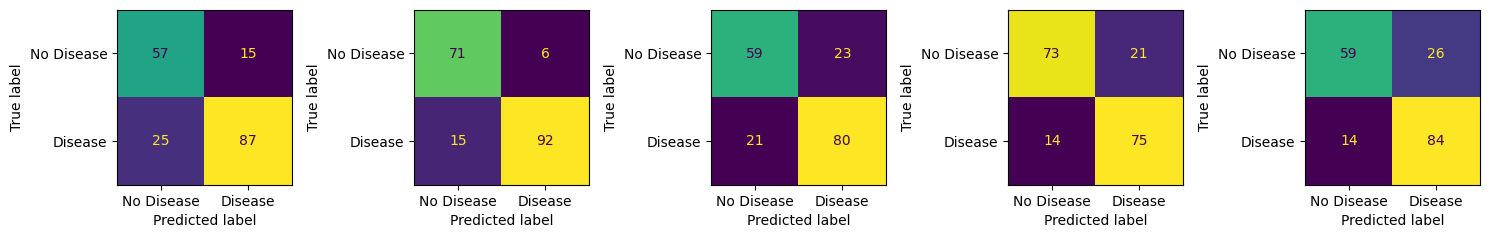

In [36]:
fig, axs = plt.subplots(ncols=5, figsize=(15, 15))

for i, (X_train, X_test, y_train, y_test) in enumerate(zip(X_trains4, X_tests4, y_trains4, y_tests4)):
  X_train_scaled = X_train.copy()
  X_test_scaled = X_test.copy()

  X_train_scaled[cols_to_scale] = std_scaler.fit_transform(X_train[cols_to_scale])
  X_test_scaled[cols_to_scale] = std_scaler.transform(X_test[cols_to_scale])

  lr = LogisticRegression(random_state=42)
  lr.fit(X_train_scaled, y_train)
  y_pred = lr.predict(X_test_scaled)

  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(
      confusion_matrix=cm,
      display_labels=['No Disease', 'Disease']
  )

  disp.plot(ax=axs[i], colorbar=False)

plt.tight_layout()
plt.show()

Up there it seemed strange, but actually the confusion matrix changed a bit - in the majority of cases predicting 1 more true positive.

### **Normalization**

As it is quite close to scaling, let's do it on the same dataset and compare the results.

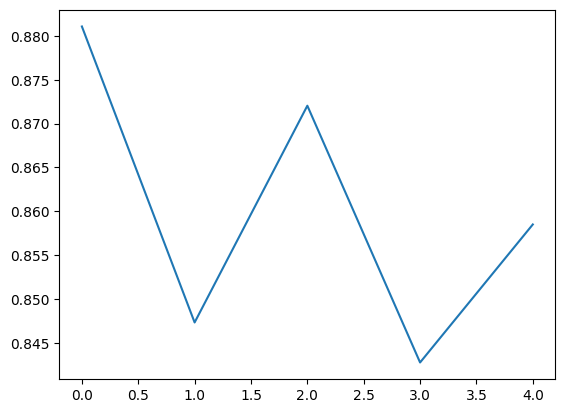

In [37]:
cols_to_scale = ['writing score', 'reading score']
mm_scaler = MinMaxScaler()
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains1, X_tests1, y_trains1, y_tests1):
  X_train_scaled = X_train.copy()
  X_test_scaled = X_test.copy()

  X_train_scaled[cols_to_scale] = mm_scaler.fit_transform(X_train[cols_to_scale])
  X_test_scaled[cols_to_scale] = mm_scaler.transform(X_test[cols_to_scale])

  lr = LinearRegression()
  lr.fit(X_train_scaled, y_train)
  scores.append(lr.score(X_test_scaled, y_test))

plt.plot(scores)
plt.show()

The same - nothing changed.

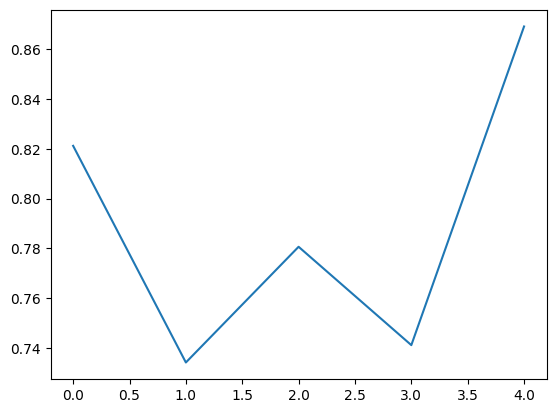

In [38]:
cols_to_scale = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']
mm_scaler = MinMaxScaler()
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains2, X_tests2, y_trains2, y_tests2):
  X_train_scaled = X_train.copy()
  X_test_scaled = X_test.copy()

  X_train_scaled[cols_to_scale] = mm_scaler.fit_transform(X_train[cols_to_scale])
  X_test_scaled[cols_to_scale] = mm_scaler.transform(X_test[cols_to_scale])

  lr = LinearRegression()
  lr.fit(X_train_scaled, y_train)
  scores.append(lr.score(X_test_scaled, y_test))

plt.plot(scores)
plt.show()

No changes... At all.

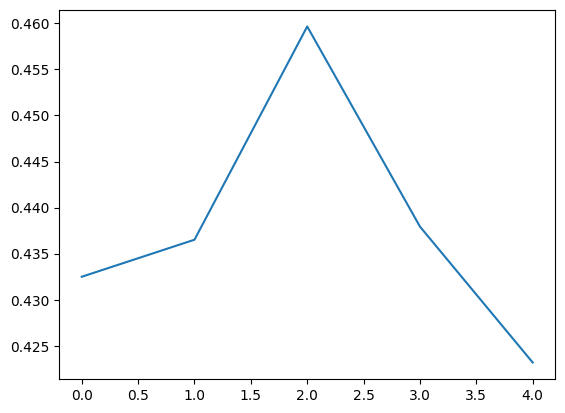

In [39]:
cols_to_scale = ['Date', '4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags']
mm_scaler = MinMaxScaler()
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains3, X_tests3, y_trains3, y_tests3):
  X_train_scaled = X_train.copy()
  X_test_scaled = X_test.copy()

  X_train_scaled[cols_to_scale] = mm_scaler.fit_transform(X_train[cols_to_scale])
  X_test_scaled[cols_to_scale] = mm_scaler.transform(X_test[cols_to_scale])

  lr = LinearRegression()
  lr.fit(X_train_scaled, y_train)
  scores.append(lr.score(X_test_scaled, y_test))

plt.plot(scores)
plt.show()

As bad as the previous scaling algorithm...

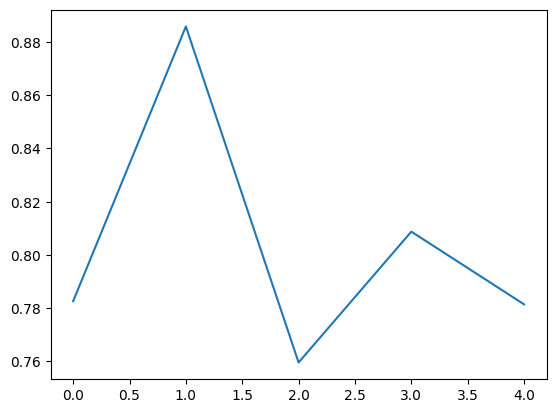

In [40]:
cols_to_scale = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR','Oldpeak']
mm_scaler = MinMaxScaler()
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains4, X_tests4, y_trains4, y_tests4):
  X_train_scaled = X_train.copy()
  X_test_scaled = X_test.copy()

  X_train_scaled[cols_to_scale] = std_scaler.fit_transform(X_train[cols_to_scale])
  X_test_scaled[cols_to_scale] = std_scaler.transform(X_test[cols_to_scale])

  lr = LogisticRegression()
  lr.fit(X_train_scaled, y_train)
  scores.append(lr.score(X_test_scaled, y_test))

plt.plot(scores)
plt.show()

NOTHING

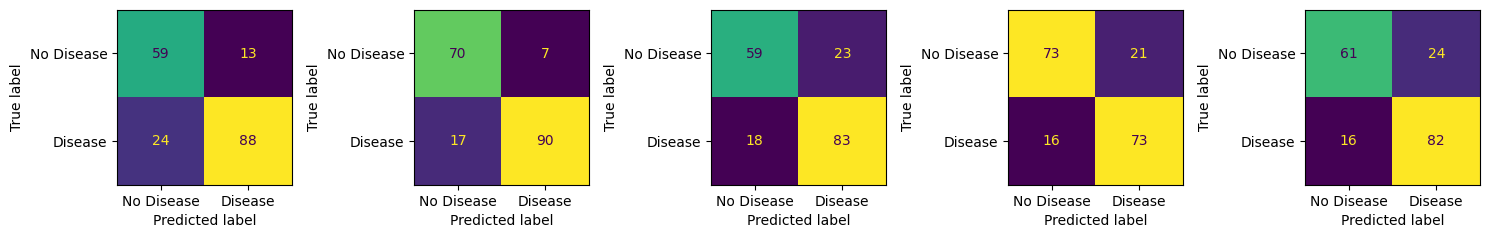

In [41]:
fig, axs = plt.subplots(ncols=5, figsize=(15, 15))

for i, (X_train, X_test, y_train, y_test) in enumerate(zip(X_trains4, X_tests4, y_trains4, y_tests4)):
  X_train_scaled = X_train.copy()
  X_test_scaled = X_test.copy()

  X_train_scaled[cols_to_scale] = mm_scaler.fit_transform(X_train[cols_to_scale])
  X_test_scaled[cols_to_scale] = mm_scaler.transform(X_test[cols_to_scale])

  lr = LogisticRegression(random_state=42)
  lr.fit(X_train_scaled, y_train)
  y_pred = lr.predict(X_test_scaled)

  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(
      confusion_matrix=cm,
      display_labels=['No Disease', 'Disease']
  )

  disp.plot(ax=axs[i], colorbar=False)

plt.tight_layout()
plt.show()

But the results look different now. Actually, it seems that the model predictions became worse, as the number of true positives decreased.

## **Dummy vars**

In [42]:
dum_cols = ['race/ethnicity', 'parental level of education']
df_st_per = (pd.get_dummies(df_st_per, columns=dum_cols)).astype(int)

In [43]:
X = df_st_per.drop('math score', axis=1)
y = df_st_per['math score']

splits = list(kf.split(X))

X_trains1 = [X.iloc[train_idx] for train_idx, _ in splits]
X_tests1  = [X.iloc[val_idx]   for _, val_idx in splits]
y_trains1 = [y.iloc[train_idx] for train_idx, _ in splits]
y_tests1  = [y.iloc[val_idx]   for _, val_idx in splits]

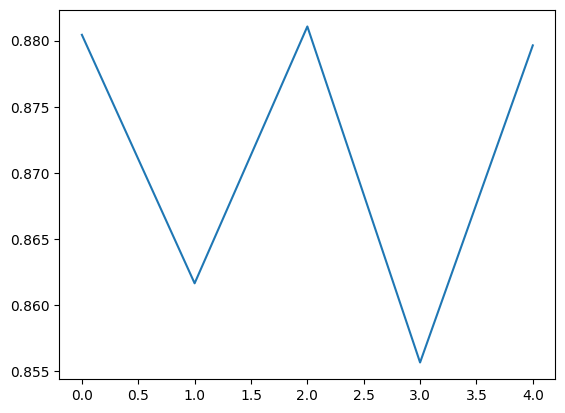

In [44]:
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains1, X_tests1, y_trains1, y_tests1):
  lr = LinearRegression()
  lr.fit(X_train, y_train)
  scores.append(lr.score(X_test, y_test))

plt.plot(scores)
plt.show()

The performance increased! Nice, that means that not encoded categorical columns actually carried some meaningful data.

In [45]:
dum_cols = ['region']
df_av = (pd.get_dummies(df_av, columns=dum_cols)).astype(int)

In [46]:
X = df_av.drop('AveragePrice', axis=1)
y = df_av['AveragePrice']

splits = list(kf.split(X))

X_trains3 = [X.iloc[train_idx] for train_idx, _ in splits]
X_tests3  = [X.iloc[val_idx]   for _, val_idx in splits]
y_trains3 = [y.iloc[train_idx] for train_idx, _ in splits]
y_tests3  = [y.iloc[val_idx]   for _, val_idx in splits]

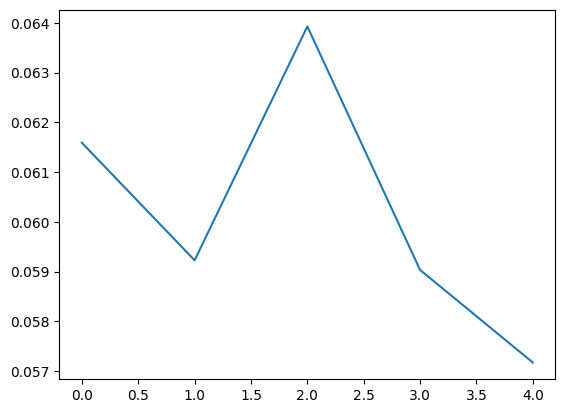

In [47]:
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains3, X_tests3, y_trains3, y_tests3):
  lr = LinearRegression()
  lr.fit(X_train, y_train)
  scores.append(lr.score(X_test, y_test))

plt.plot(scores)
plt.show()

The performance dropped, even though it's not as bad as from scaling, the dummy vars may be too many so they act as noise for that model.

In [48]:
df_heart = (pd.get_dummies(df_heart, columns=categorical_columns)).astype(int)

In [49]:
X = df_heart.drop(['HeartDisease'], axis=1)
y = df_heart['HeartDisease']

splits = list(kf.split(X))

X_trains4 = [X.iloc[train_idx] for train_idx, _ in splits]
X_tests4  = [X.iloc[val_idx]   for _, val_idx in splits]
y_trains4 = [y.iloc[train_idx] for train_idx, _ in splits]
y_tests4  = [y.iloc[val_idx]   for _, val_idx in splits]

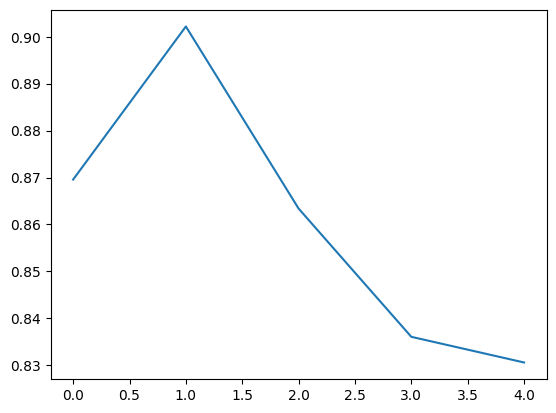

In [50]:
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains4, X_tests4, y_trains4, y_tests4):
  lr = LogisticRegression()
  lr.fit(X_train, y_train)
  scores.append(lr.score(X_test, y_test))

plt.plot(scores)
plt.show()

The performance raised through all the samples! That means that these columns were valuable for LogisticRegression correlations.

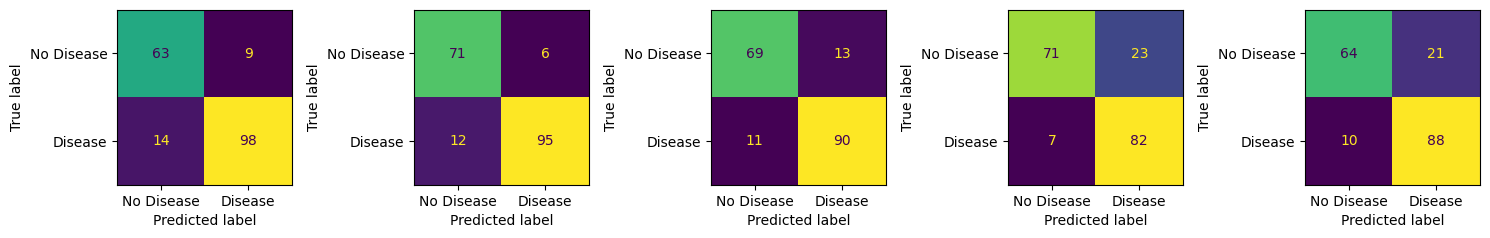

In [51]:
fig, axs = plt.subplots(ncols=5, figsize=(15, 15))

for i, (X_train, X_test, y_train, y_test) in enumerate(zip(X_trains4, X_tests4, y_trains4, y_tests4)):
  X_train_scaled = X_train.copy()
  X_test_scaled = X_test.copy()

  X_train_scaled[cols_to_scale] = std_scaler.fit_transform(X_train[cols_to_scale])
  X_test_scaled[cols_to_scale] = std_scaler.transform(X_test[cols_to_scale])

  lr = LogisticRegression(random_state=42)
  lr.fit(X_train_scaled, y_train)
  y_pred = lr.predict(X_test_scaled)

  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(
      confusion_matrix=cm,
      display_labels=['No Disease', 'Disease']
  )

  disp.plot(ax=axs[i], colorbar=False)

plt.tight_layout()
plt.show()

Up to 98 people correctly spotted! And the number of mismatches also decreased a lot!

## **Box-Cox Transformation**

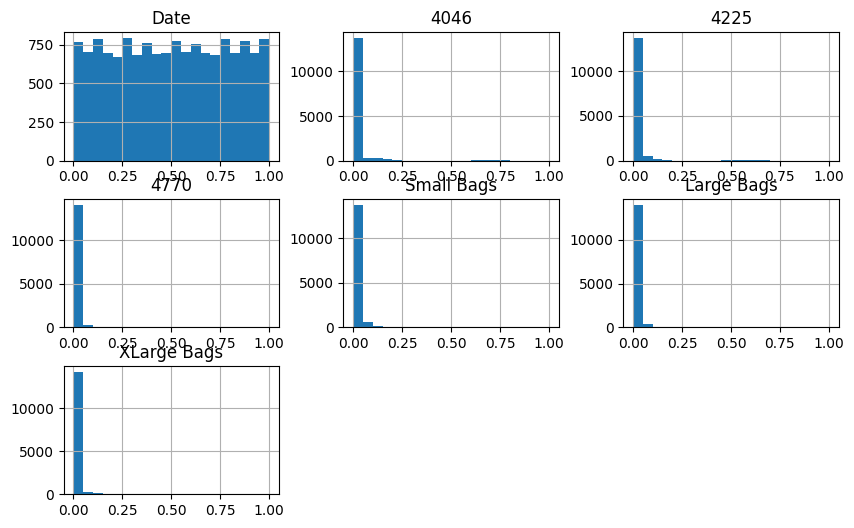

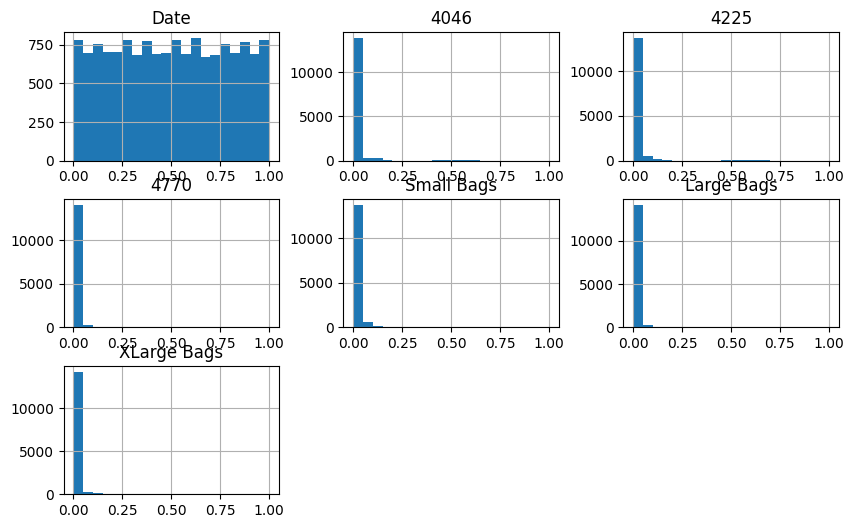

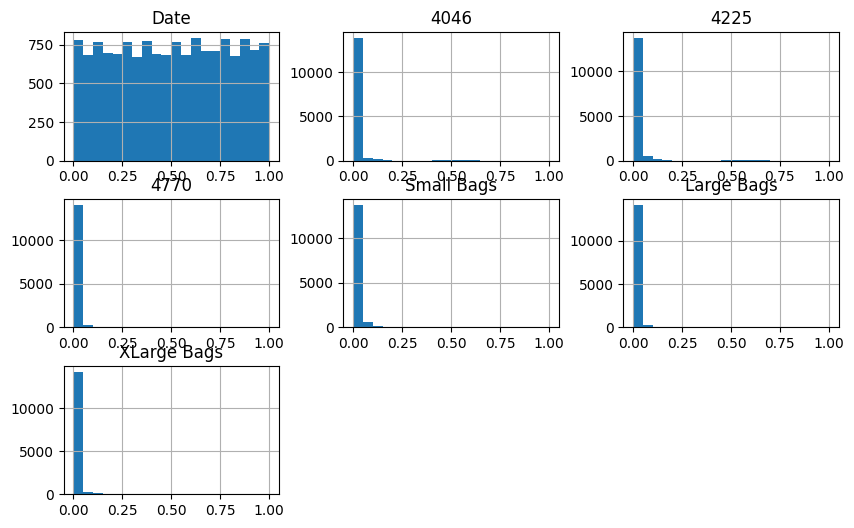

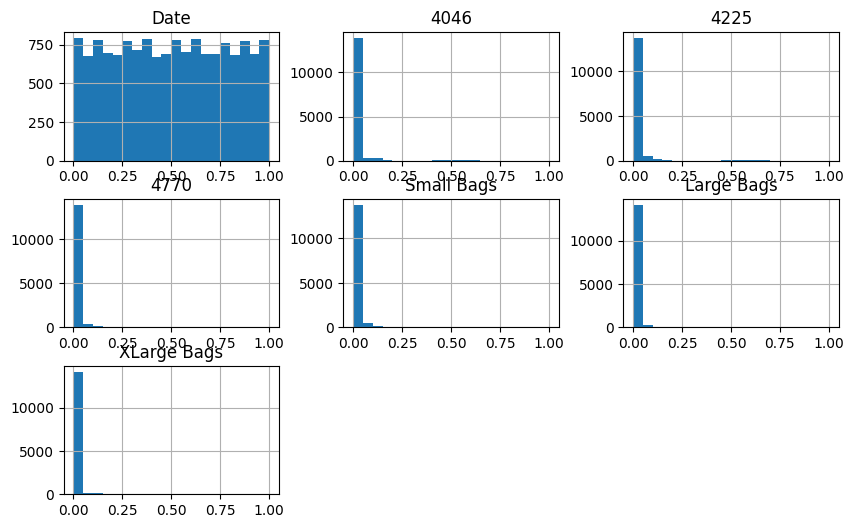

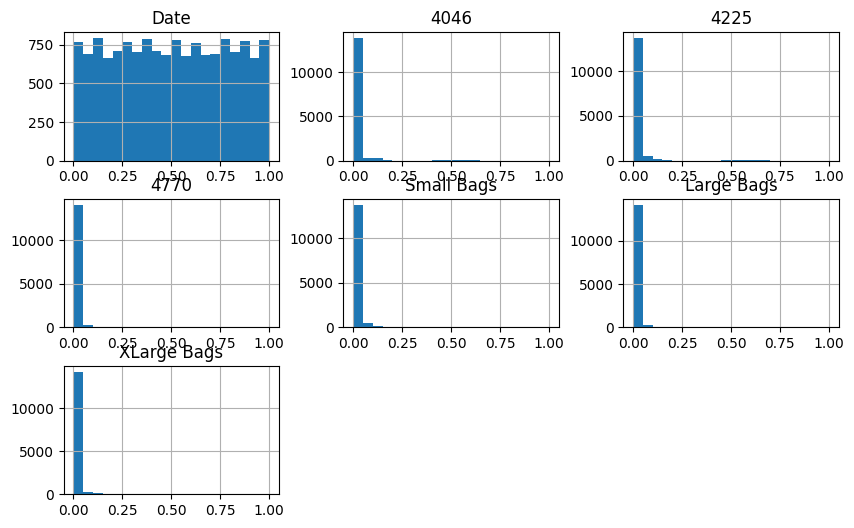

In [52]:
cols_to_scale = ['Date', '4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags']
mm_scaler = MinMaxScaler()
scores = []
X_trains_scaled = []
X_tests_scaled = []

for (X_train, X_test, y_train, y_test) in zip(X_trains3, X_tests3, y_trains3, y_tests3):
  X_train_scaled = X_train.copy()
  X_test_scaled = X_test.copy()

  X_train_scaled[cols_to_scale] = mm_scaler.fit_transform(X_train[cols_to_scale])
  X_test_scaled[cols_to_scale] = mm_scaler.transform(X_test[cols_to_scale])

  X_trains_scaled.append(X_train_scaled)
  X_tests_scaled.append(X_test_scaled)

  X_train_scaled[cols_to_scale].hist(bins=20, figsize=(10, 6))

plt.plot(scores)
plt.show()

In [53]:
bx_transformer = BoxCoxTransformer(l=0.08)

for i in range(5):
  X_trains_scaled[i][cols_to_scale] = bx_transformer.fit_transform(
    X_trains_scaled[i][cols_to_scale].values, y_trains3[i].values
  )

  X_tests_scaled[i][cols_to_scale] = bx_transformer.transform(
    X_tests_scaled[i][cols_to_scale].values
  )

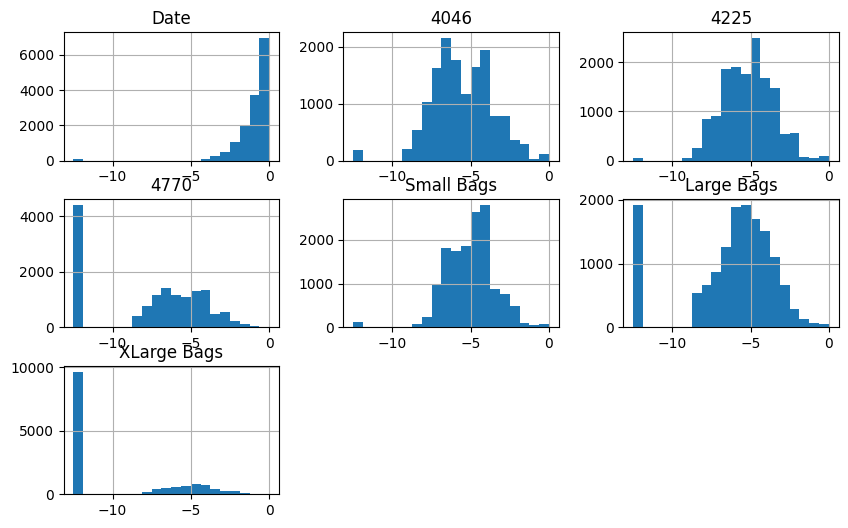

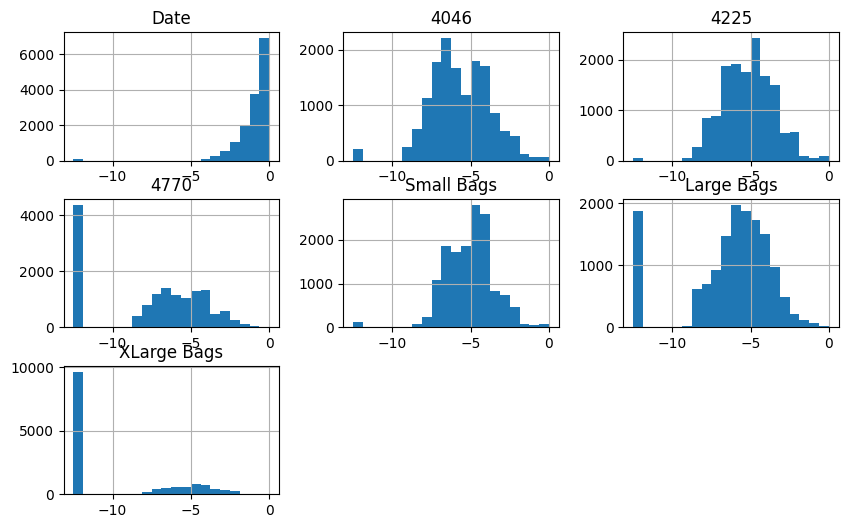

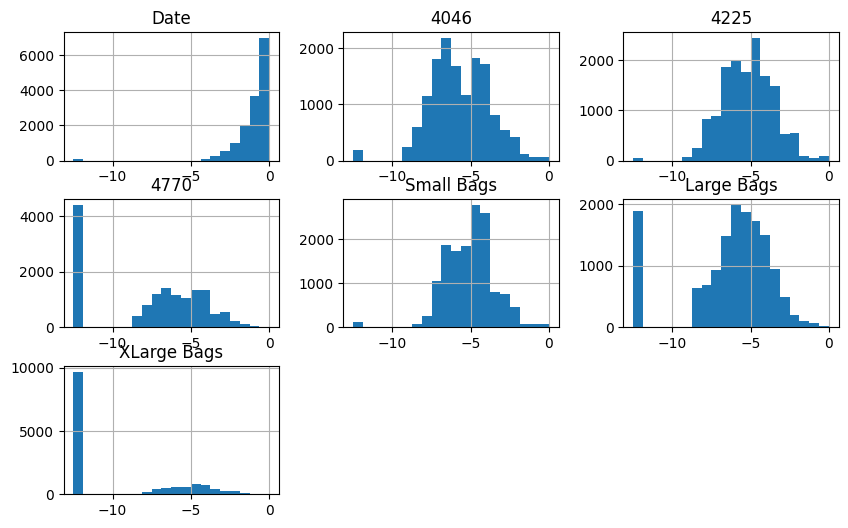

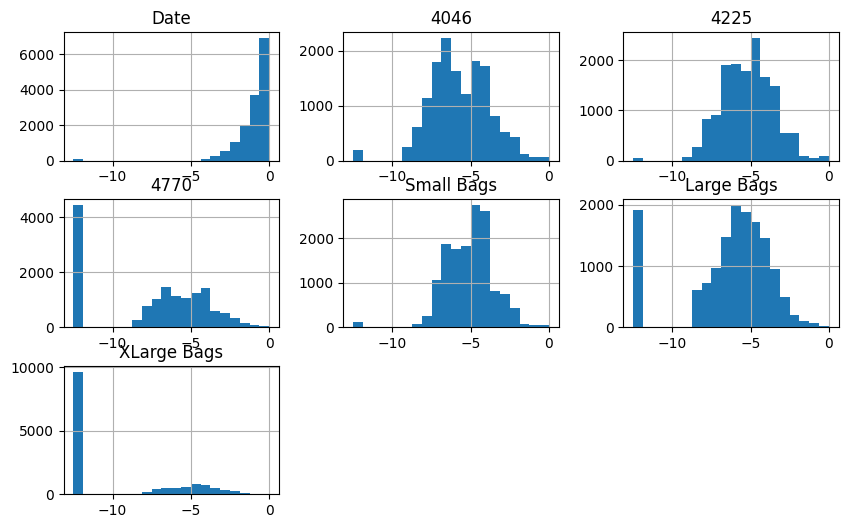

In [54]:
for i in range(4):
  X_trains_scaled[i][cols_to_scale].hist(bins=20, figsize=(10, 6))

plt.plot(scores)
plt.show()

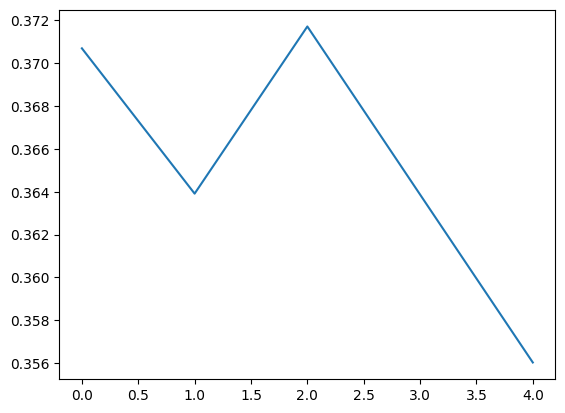

In [55]:
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains_scaled, X_tests_scaled, y_trains3, y_tests3):
  lr = LinearRegression()
  lr.fit(X_train, y_train)
  scores.append(lr.score(X_test, y_test))

plt.plot(scores)
plt.show()

Unfortunately, Box-Cox doesn't work on that data. The performance drastically dropped. Most probably, because it hadn't made it completely normally distributed - even though there appears to be a bell, there is still a high column at the left.

## **ZCA Transformation**

In [56]:
X = df_heart.drop(['HeartDisease'], axis=1)
y = df_heart['HeartDisease']

splits = list(kf.split(X))

X_trains4 = [X.iloc[train_idx] for train_idx, _ in splits]
X_tests4  = [X.iloc[val_idx]   for _, val_idx in splits]
y_trains4 = [y.iloc[train_idx] for train_idx, _ in splits]
y_tests4  = [y.iloc[val_idx]   for _, val_idx in splits]

In [57]:
cols_to_scale = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR','Oldpeak']

X_trains_scaled = [X_train.copy() for X_train in X_trains4]
X_tests_scaled = [X_test.copy() for X_test in X_tests4]

In [58]:
zca_transformer = ZCATransformer()

for i in range(4):
  X_trains_scaled[i][cols_to_scale] = zca_transformer.fit_transform(
    X_trains_scaled[i][cols_to_scale].values, y_trains3[i].values
  )

  X_tests_scaled[i][cols_to_scale] = zca_transformer.transform(
    X_tests_scaled[i][cols_to_scale].values
  )

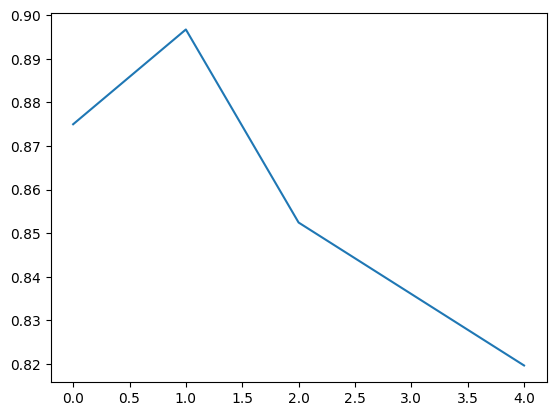

In [59]:
mm_scaler = MinMaxScaler()
scores = []

for i in range(5):
  X_trains_scaled[i][cols_to_scale] = mm_scaler.fit_transform(X_trains_scaled[i][cols_to_scale])
  X_tests_scaled[i][cols_to_scale] = mm_scaler.transform(X_tests_scaled[i][cols_to_scale])

  lr = LogisticRegression()
  lr.fit(X_trains_scaled[i], y_trains4[i])
  scores.append(lr.score(X_tests_scaled[i], y_tests4[i]))

plt.plot(scores)
plt.show()

Even though the performance dropped a bit for some folds, it is still quite good. Let's take a look at the results!

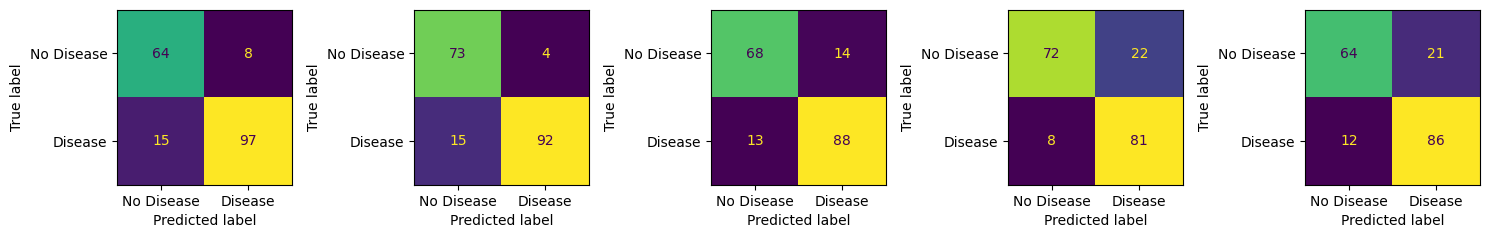

In [60]:
fig, axs = plt.subplots(ncols=5, figsize=(15, 15))

for i, (X_train, X_test, y_train, y_test) in enumerate(zip(X_trains_scaled, X_tests_scaled, y_trains4, y_tests4)):

  lr = LogisticRegression(random_state=42)
  lr.fit(X_train, y_train)
  y_pred = lr.predict(X_test)

  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(
      confusion_matrix=cm,
      display_labels=['No Disease', 'Disease']
  )

  disp.plot(ax=axs[i], colorbar=False)

plt.tight_layout()
plt.show()

Actually, the results have became slightly better for negatives, but worse for positives(bad for our case).

## **Frequency Imputation**

Let's load one more time the 4th dataset(as we replaced categorical cols with dummies)

In [61]:
df_heart = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "fedesoriano/heart-failure-prediction",
  "heart.csv"
)

Using Colab cache for faster access to the 'heart-failure-prediction' dataset.


In [62]:
df_heart['Sex'] = df_heart['Sex'].replace({'F': 1, 'M': 0})
df_heart['ExerciseAngina'] = df_heart['ExerciseAngina'].replace({'Y': 1, 'N': 0})

In [63]:
categorical_columns = df_heart.select_dtypes(include=['object']).columns.tolist()

Let's look at categorical columns' frequency

In [64]:
for i in categorical_columns:
  for j in df_heart[i].unique():
    print(i, j, df_heart[df_heart[i] == j][i].count())

ChestPainType ATA 173
ChestPainType NAP 203
ChestPainType ASY 496
ChestPainType TA 46
RestingECG Normal 552
RestingECG ST 178
RestingECG LVH 188
ST_Slope Up 395
ST_Slope Flat 460
ST_Slope Down 63


The frequency varies - nice, we can use frequency imputation transformer.

In [65]:
df_heart = df_heart.drop(df_heart[df_heart['RestingBP'] < 75].index)

Split the dataset

In [107]:
X = df_heart.drop(['HeartDisease'], axis=1)
y = df_heart['HeartDisease']

splits = list(kf.split(X))

X_trains4 = [X.iloc[train_idx] for train_idx, _ in splits]
X_tests4  = [X.iloc[val_idx]   for _, val_idx in splits]
y_trains4 = [y.iloc[train_idx] for train_idx, _ in splits]
y_tests4  = [y.iloc[val_idx]   for _, val_idx in splits]

In [108]:
X_trains4[0].columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')

In [109]:
categorical_columns

['ChestPainType', 'RestingECG', 'ST_Slope']

In [110]:
X_trains4[0][categorical_columns].nunique()

,0
ChestPainType,4
RestingECG,3
ST_Slope,3


In [111]:
indices = [X_trains4[0].columns.get_loc(c) for c in categorical_columns]

I wasted an hour to understand the problem with fr_transformer..................

In [112]:
lbl_encoder = LabelEncoder()

for j in range(5):
  for col in categorical_columns:
    X_trains4[j][col] = lbl_encoder.fit_transform(X_trains4[j][col])
    X_tests4[j][col] = lbl_encoder.transform(X_tests4[j][col])

  col_indices = [X_trains4[j].columns.get_loc(c) for c in categorical_columns]

  fr_transformer = FrequencyImputationTransformer(index=col_indices)

  X_trains4[j] = pd.DataFrame(fr_transformer.fit_transform(
    X=X_trains4[j].values,
    y=y_trains4[j].values),
    columns = X_trains4[j].columns
  )

  X_tests4[j] = pd.DataFrame(fr_transformer.transform(X_tests4[j].values),
      columns = X_tests4[j].columns
      )

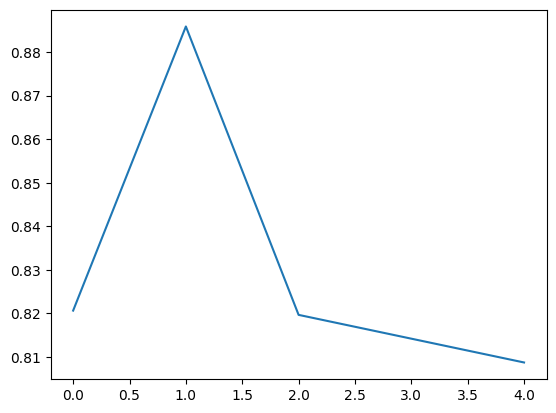

In [113]:
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains4, X_tests4, y_trains4, y_tests4):
  lr = LogisticRegression()
  lr.fit(X_train, y_train)
  scores.append(lr.score(X_test, y_test))

plt.plot(scores)
plt.show()

Overall, it is quite good(definetely better than original). It means that the frequency of those categorical features is quite important.

In [114]:
X_trains4[0].describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
count,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.00000,733.000000,733.000000,733.000000
mean,53.624829,0.218281,0.375762,132.834925,200.875853,0.231924,0.440428,136.18281,0.407913,0.901228,0.441187
std,9.379945,0.413361,0.174386,17.763359,108.804028,0.422349,0.196121,25.38683,0.491782,1.086799,0.106398
min,29.000000,0.000000,0.049113,94.000000,0.000000,0.000000,0.189632,60.00000,0.000000,-2.600000,0.068213
25%,47.000000,0.000000,0.227831,120.000000,178.000000,0.000000,0.210095,119.00000,0.000000,0.000000,0.431105
50%,54.000000,0.000000,0.534789,130.000000,223.000000,0.000000,0.600273,138.00000,0.000000,0.500000,0.500682
75%,60.000000,0.000000,0.534789,140.000000,269.000000,0.000000,0.600273,155.00000,1.000000,1.500000,0.500682
max,77.000000,1.000000,0.534789,200.000000,603.000000,1.000000,0.600273,202.00000,1.000000,6.200000,0.500682


Yeah, it works(FINALLY!!!!!!!!)

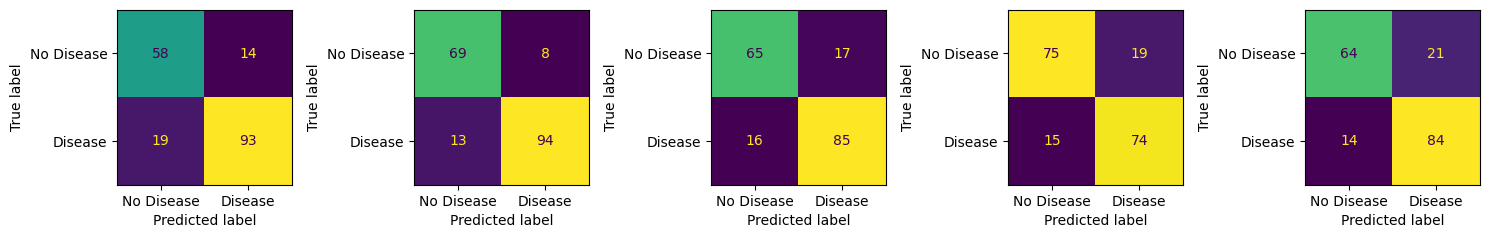

In [115]:
fig, axs = plt.subplots(ncols=5, figsize=(15, 15))

for i, (X_train, X_test, y_train, y_test) in enumerate(zip(X_trains4, X_tests4, y_trains4, y_tests4)):
    lr = LogisticRegression(random_state=42)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=['No Disease', 'Disease']
    )

    disp.plot(ax=axs[i], colorbar=False)

plt.tight_layout()
plt.show()

It also looks definitely better.
(I tried to scale, but got worse results)

## **TargetImputationTransformer**

In [117]:
X = df_heart.drop(['HeartDisease'], axis=1)
y = df_heart['HeartDisease']

splits = list(kf.split(X))

X_trains4 = [X.iloc[train_idx] for train_idx, _ in splits]
X_tests4  = [X.iloc[val_idx]   for _, val_idx in splits]
y_trains4 = [y.iloc[train_idx] for train_idx, _ in splits]
y_tests4  = [y.iloc[val_idx]   for _, val_idx in splits]

In [118]:
X_trains4[0].columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')

In [119]:
categorical_columns

['ChestPainType', 'RestingECG', 'ST_Slope']

In [120]:
X_trains4[0][categorical_columns].nunique()

,0
ChestPainType,4
RestingECG,3
ST_Slope,3


In [121]:
indices = [X_trains4[0].columns.get_loc(c) for c in categorical_columns]

In [124]:
lbl_encoder = LabelEncoder()

for j in range(5):
  for col in categorical_columns:
    X_trains4[j][col] = lbl_encoder.fit_transform(X_trains4[j][col])
    X_tests4[j][col] = lbl_encoder.transform(X_tests4[j][col])

  col_indices = [X_trains4[j].columns.get_loc(c) for c in categorical_columns]

  tg_transformer = TargetImputationTransformer(index=col_indices)

  X_trains4[j] = pd.DataFrame(tg_transformer.fit_transform(
    X=X_trains4[j].values,
    y=y_trains4[j].values),
    columns = X_trains4[j].columns
  )

  X_tests4[j] = pd.DataFrame(tg_transformer.transform(X_tests4[j].values),
      columns = X_tests4[j].columns
      )

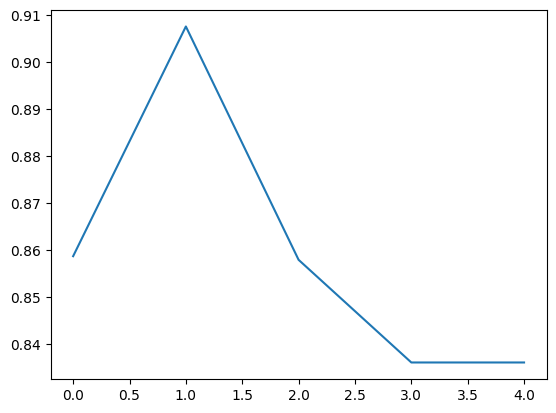

In [125]:
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains4, X_tests4, y_trains4, y_tests4):
  lr = LogisticRegression()
  lr.fit(X_train, y_train)
  scores.append(lr.score(X_test, y_test))

plt.plot(scores)
plt.show()

Overall, it is good and generally works better than original one and better than FrequencyImputerTransformer.

In [126]:
X_trains4[0].describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
count,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.00000,733.000000,733.000000,733.000000
mean,53.624829,0.218281,0.538881,132.834925,200.875853,0.231924,0.538881,136.18281,0.407913,0.901228,0.538881
std,9.379945,0.413361,0.274442,17.763359,108.804028,0.422349,0.061321,25.38683,0.491782,1.086799,0.317836
min,29.000000,0.000000,0.115942,94.000000,0.000000,0.000000,0.495455,60.00000,0.000000,-2.600000,0.174051
25%,47.000000,0.000000,0.341317,120.000000,178.000000,0.000000,0.495455,119.00000,0.000000,0.000000,0.174051
50%,54.000000,0.000000,0.783163,130.000000,223.000000,0.000000,0.495455,138.00000,0.000000,0.500000,0.817439
75%,60.000000,0.000000,0.783163,140.000000,269.000000,0.000000,0.558442,155.00000,1.000000,1.500000,0.817439
max,77.000000,1.000000,0.783163,200.000000,603.000000,1.000000,0.654676,202.00000,1.000000,6.200000,0.817439


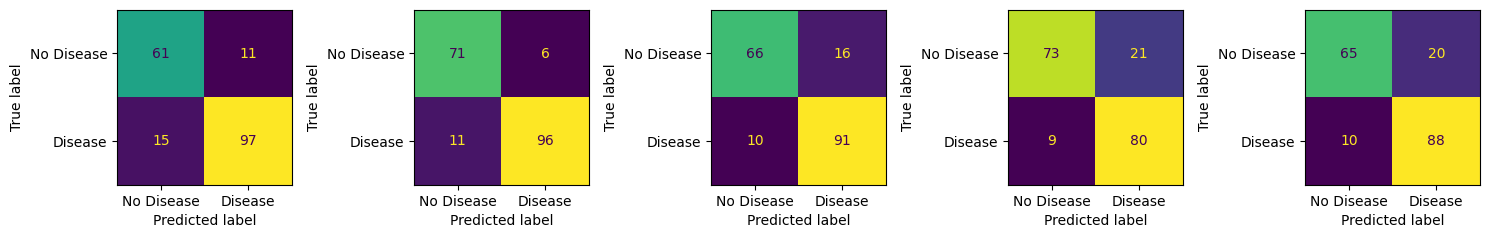

In [127]:
fig, axs = plt.subplots(ncols=5, figsize=(15, 15))

for i, (X_train, X_test, y_train, y_test) in enumerate(zip(X_trains4, X_tests4, y_trains4, y_tests4)):
    lr = LogisticRegression(random_state=42)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=['No Disease', 'Disease']
    )

    disp.plot(ax=axs[i], colorbar=False)

plt.tight_layout()
plt.show()

Let's try to make our results better - scale the data!

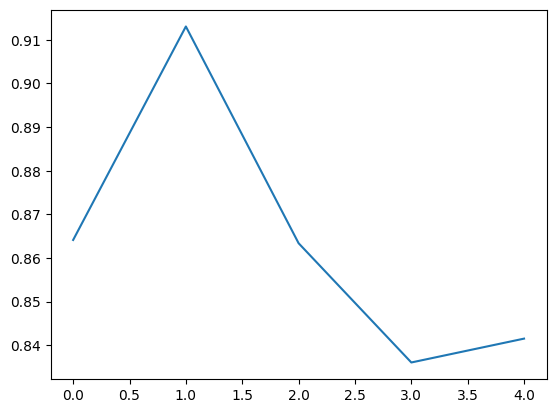

In [128]:
cols_to_scale = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR','Oldpeak']
mm_scaler = MinMaxScaler()
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains4, X_tests4, y_trains4, y_tests4):
  X_train_scaled = X_train.copy()
  X_test_scaled = X_test.copy()

  X_train_scaled[cols_to_scale] = std_scaler.fit_transform(X_train[cols_to_scale])
  X_test_scaled[cols_to_scale] = std_scaler.transform(X_test[cols_to_scale])

  lr = LogisticRegression()
  lr.fit(X_train_scaled, y_train)
  scores.append(lr.score(X_test_scaled, y_test))

plt.plot(scores)
plt.show()

Sligthly better.

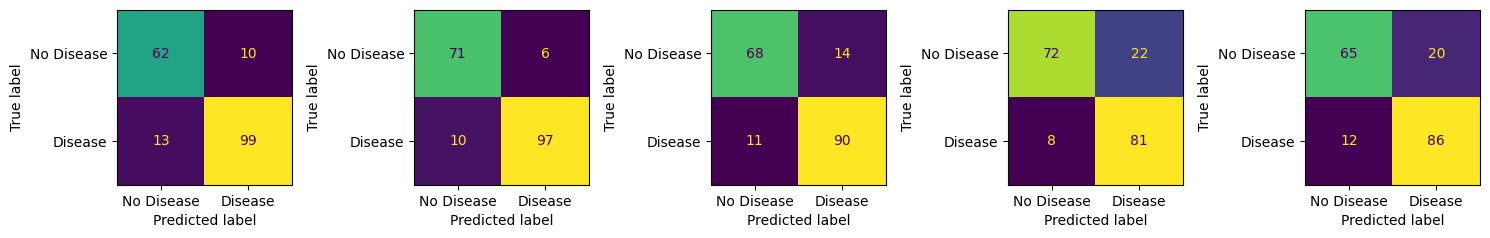

In [129]:
fig, axs = plt.subplots(ncols=5, figsize=(15, 15))

for i, (X_train, X_test, y_train, y_test) in enumerate(zip(X_trains4, X_tests4, y_trains4, y_tests4)):
  X_train_scaled = X_train.copy()
  X_test_scaled = X_test.copy()

  X_train_scaled[cols_to_scale] = mm_scaler.fit_transform(X_train[cols_to_scale])
  X_test_scaled[cols_to_scale] = mm_scaler.transform(X_test[cols_to_scale])

  lr = LogisticRegression(random_state=42)
  lr.fit(X_train_scaled, y_train)
  y_pred = lr.predict(X_test_scaled)

  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(
      confusion_matrix=cm,
      display_labels=['No Disease', 'Disease']
  )

  disp.plot(ax=axs[i], colorbar=False)

plt.tight_layout()
plt.show()

The performance is comparable with using dummies, in some cases even outperforming. Actually, I'd have taken that one instead of dummies, because it takes fewer dimensions - 1 per column, instead of nr. of categories per column.

## **SmoothingTransformer**

In [143]:
X = df_heart.drop(['HeartDisease'], axis=1)
y = df_heart['HeartDisease']

splits = list(kf.split(X))

X_trains4 = [X.iloc[train_idx] for train_idx, _ in splits]
X_tests4  = [X.iloc[val_idx]   for _, val_idx in splits]
y_trains4 = [y.iloc[train_idx] for train_idx, _ in splits]
y_tests4  = [y.iloc[val_idx]   for _, val_idx in splits]

In [144]:
indices = [X_trains4[0].columns.get_loc(c) for c in categorical_columns]

In [145]:
lbl_encoder = LabelEncoder()

for j in range(5):
  for col in categorical_columns:
    X_trains4[j][col] = lbl_encoder.fit_transform(X_trains4[j][col])
    X_tests4[j][col] = lbl_encoder.transform(X_tests4[j][col])

  col_indices = [X_trains4[j].columns.get_loc(c) for c in categorical_columns]

  sm_transformer = SmoothingTransformer(index=col_indices)

  X_trains4[j] = pd.DataFrame(sm_transformer.fit_transform(
    X=X_trains4[j].values,
    y=y_trains4[j].values),
    columns = X_trains4[j].columns
  )

  X_tests4[j] = pd.DataFrame(sm_transformer.transform(X_tests4[j].values),
      columns = X_tests4[j].columns
      )

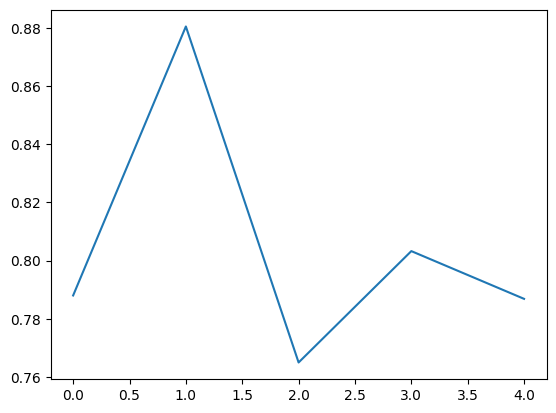

In [146]:
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains4, X_tests4, y_trains4, y_tests4):
  lr = LogisticRegression()
  lr.fit(X_train, y_train)
  scores.append(lr.score(X_test, y_test))

plt.plot(scores)
plt.show()

Its performance is similar to the original one, and as we'll see from the values below, it had smoothen too much the data(values are really tiny!)

In [147]:
X_trains4[0].describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
count,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.00000,733.000000,733.000000,733.000000
mean,53.624829,0.218281,0.008330,132.834925,200.875853,0.231924,0.007594,136.18281,0.407913,0.901228,0.007594
std,9.379945,0.413361,0.002969,17.763359,108.804028,0.422349,0.001786,25.38683,0.491782,1.086799,0.004252
min,29.000000,0.000000,0.005064,94.000000,0.000000,0.000000,0.006179,60.00000,0.000000,-2.600000,0.003446
25%,47.000000,0.000000,0.006640,120.000000,178.000000,0.000000,0.006179,119.00000,0.000000,0.000000,0.003446
50%,54.000000,0.000000,0.009206,130.000000,223.000000,0.000000,0.006179,138.00000,0.000000,0.500000,0.009643
75%,60.000000,0.000000,0.009206,140.000000,269.000000,0.000000,0.009084,155.00000,1.000000,1.500000,0.009643
max,77.000000,1.000000,0.019136,200.000000,603.000000,1.000000,0.010424,202.00000,1.000000,6.200000,0.018778


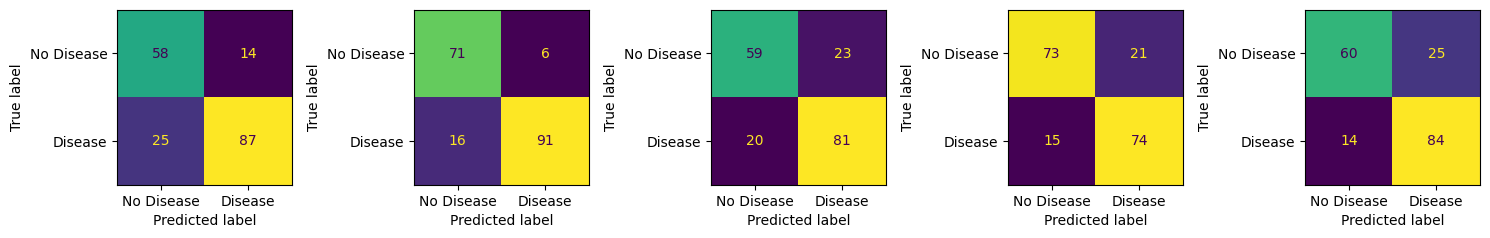

In [148]:
fig, axs = plt.subplots(ncols=5, figsize=(15, 15))

for i, (X_train, X_test, y_train, y_test) in enumerate(zip(X_trains4, X_tests4, y_trains4, y_tests4)):
    lr = LogisticRegression(random_state=42)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=['No Disease', 'Disease']
    )

    disp.plot(ax=axs[i], colorbar=False)

plt.tight_layout()
plt.show()

Let's try to enhance our results by scaling the data - maybe it'll help somehow.

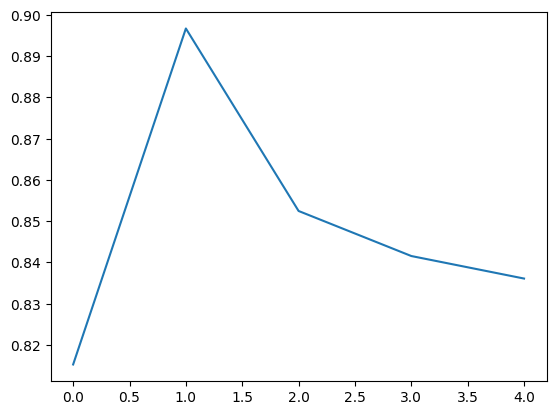

In [149]:
cols_to_scale = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR','Oldpeak', 'ChestPainType', 'RestingECG', 'ST_Slope']
mm_scaler = MinMaxScaler()
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains4, X_tests4, y_trains4, y_tests4):
  X_train_scaled = X_train.copy()
  X_test_scaled = X_test.copy()

  X_train_scaled[cols_to_scale] = std_scaler.fit_transform(X_train[cols_to_scale])
  X_test_scaled[cols_to_scale] = std_scaler.transform(X_test[cols_to_scale])

  lr = LogisticRegression()
  lr.fit(X_train_scaled, y_train)
  scores.append(lr.score(X_test_scaled, y_test))

plt.plot(scores)
plt.show()

Overall, the score increased(even though one of the folds decreased)

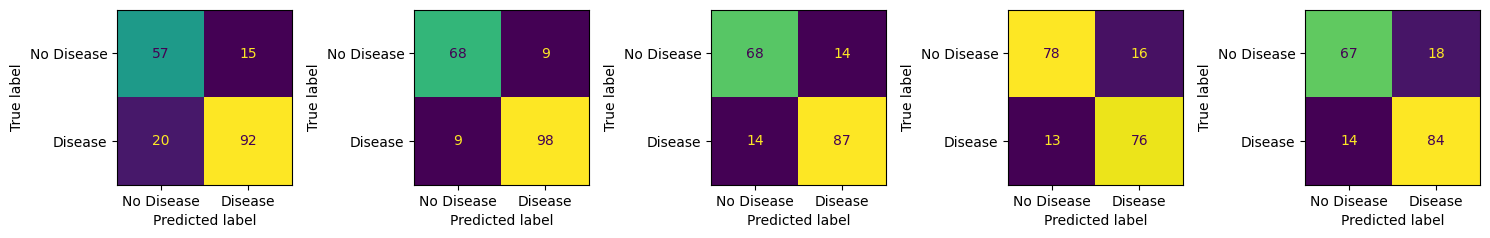

In [150]:
fig, axs = plt.subplots(ncols=5, figsize=(15, 15))

for i, (X_train, X_test, y_train, y_test) in enumerate(zip(X_trains4, X_tests4, y_trains4, y_tests4)):
  X_train_scaled = X_train.copy()
  X_test_scaled = X_test.copy()

  X_train_scaled[cols_to_scale] = mm_scaler.fit_transform(X_train[cols_to_scale])
  X_test_scaled[cols_to_scale] = mm_scaler.transform(X_test[cols_to_scale])

  lr = LogisticRegression(random_state=42)
  lr.fit(X_train_scaled, y_train)
  y_pred = lr.predict(X_test_scaled)

  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(
      confusion_matrix=cm,
      display_labels=['No Disease', 'Disease']
  )

  disp.plot(ax=axs[i], colorbar=False)

plt.tight_layout()
plt.show()

Actually, it is the first time getting such bad results on the 1st fold and such great on the second.

On the whole, after scaling we see that Smoothing actually helped and made the result more accurate.